In [3]:
import os

# Directory to save images
save_path = r"C:\Users\adarsh\Downloads\project_photos"

# Ensure the directory exists
os.makedirs(save_path, exist_ok=True)

# Save helper function
def save_image(file_name, img, cmap=None):
    full_path = os.path.join(save_path, file_name)
    if cmap:  # For grayscale or colormap images
        plt.imsave(full_path, img, cmap=cmap)
    else:  # For regular BGR or RGB images
        cv2.imwrite(full_path, img)

# Save all images
save_image("Original_Image.jpg", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
save_image("Blurred_Mean.jpg", cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
save_image("Blurred_Gaussian.jpg", cv2.cvtColor(gaussian_blur, cv2.COLOR_BGR2RGB))
save_image("Sharpened_Image.jpg", cv2.cvtColor(sharpened, cv2.COLOR_BGR2RGB))
save_image("Denoised_Image.jpg", cv2.cvtColor(denoised, cv2.COLOR_BGR2RGB))
save_image("Equalized_Histogram_Gray.jpg", equalized_gray, cmap="gray")
save_image("Contrast_Enhanced_Image.jpg", cv2.cvtColor(converted, cv2.COLOR_BGR2RGB))
save_image("Edges_Canny.jpg", edges_canny, cmap="gray")
save_image("Edges_Sobel.jpg", edges_sobel, cmap="gray")
save_image("Edges_Laplacian.jpg", edges_laplacian, cmap="gray")
save_image("Eroded_Image.jpg", eroded, cmap="gray")
save_image("Dilated_Image.jpg", dilated, cmap="gray")
save_image("Morphological_Opening.jpg", morph_open, cmap="gray")
save_image("Morphological_Closing.jpg", morph_close, cmap="gray")
save_image("Otsu_Thresholding.jpg", otsu_thresh_1, cmap="gray")
save_image("Multi_Otsu_Thresholding.jpg", regions, cmap="viridis")

print(f"All processed images have been saved successfully in {save_path}!")


All processed images have been saved successfully in C:\Users\adarsh\Downloads\project_photos!


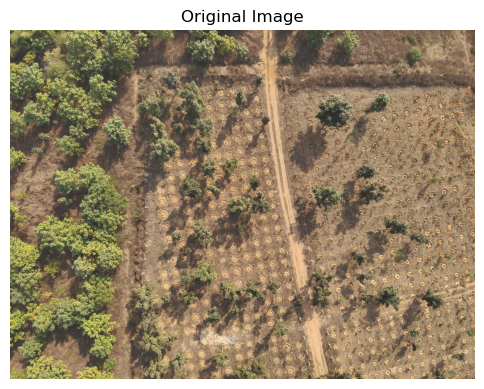

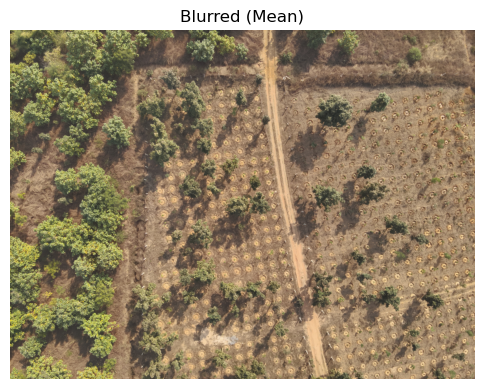

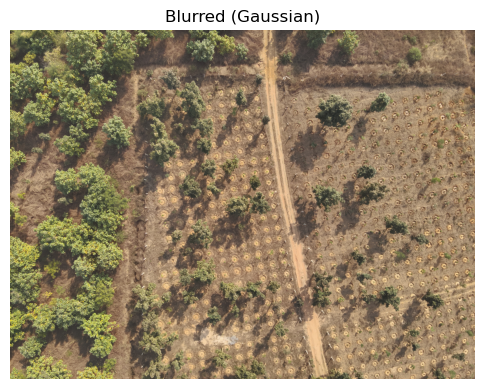

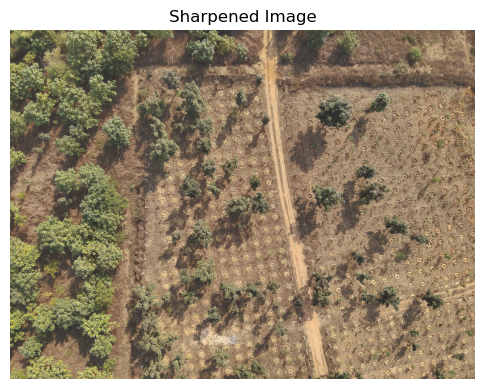

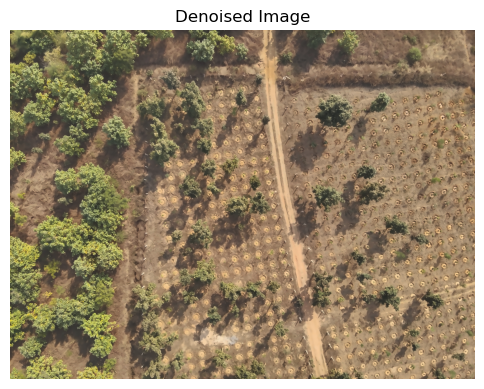

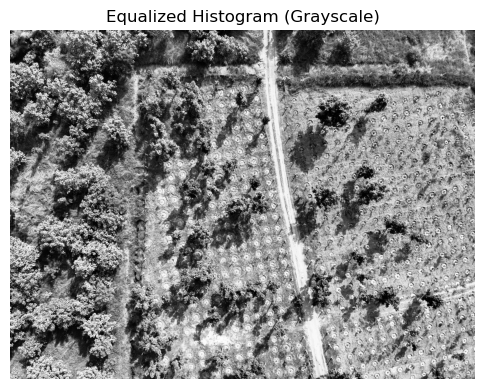

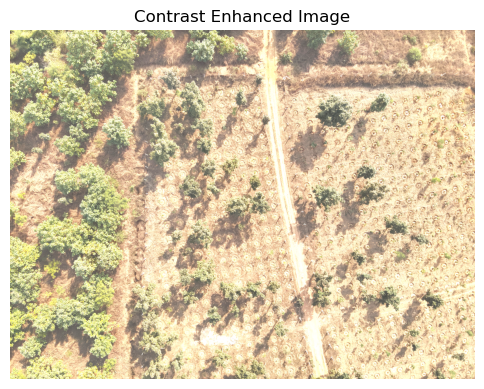

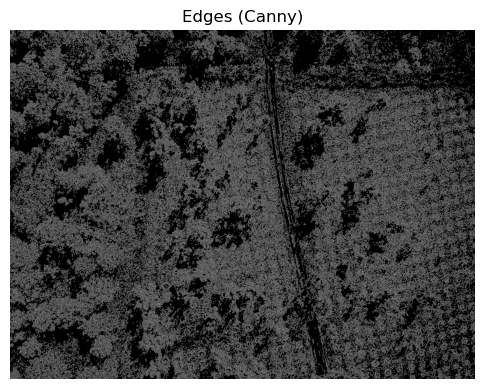

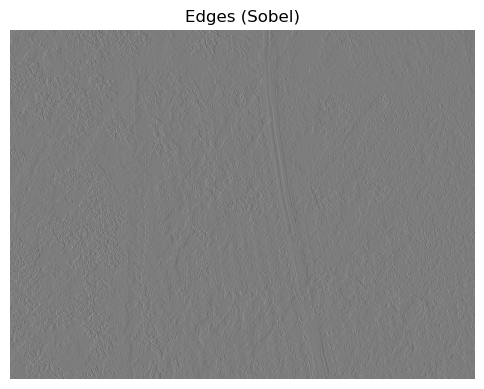

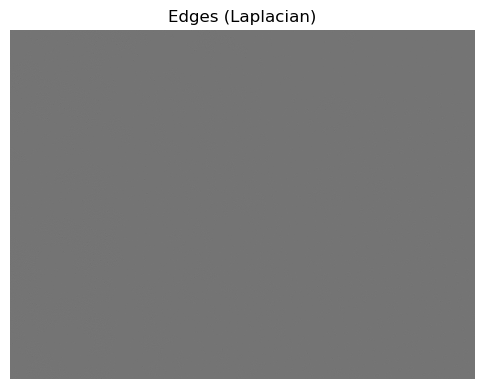

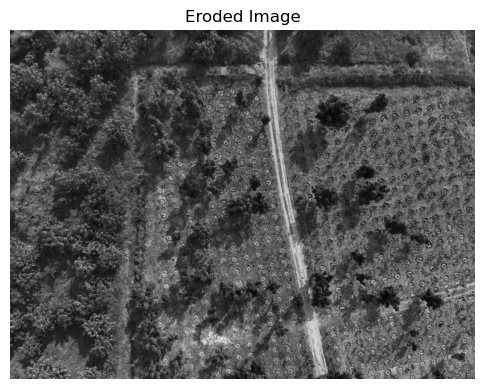

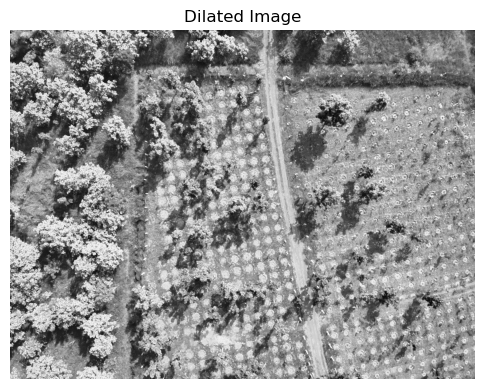

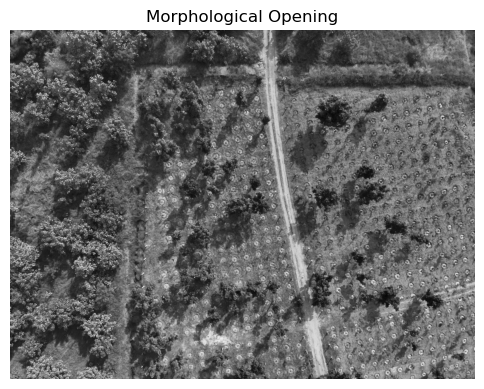

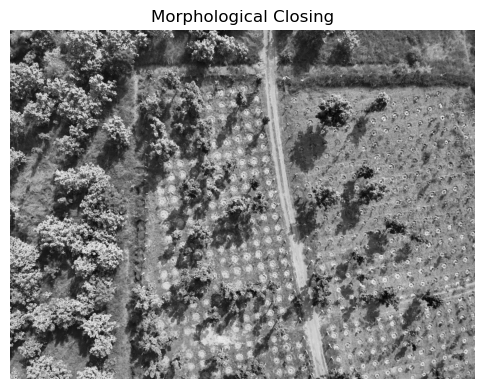

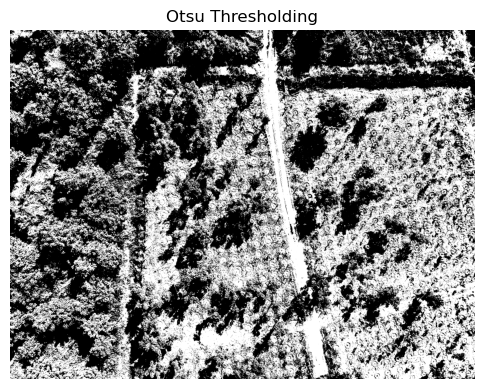

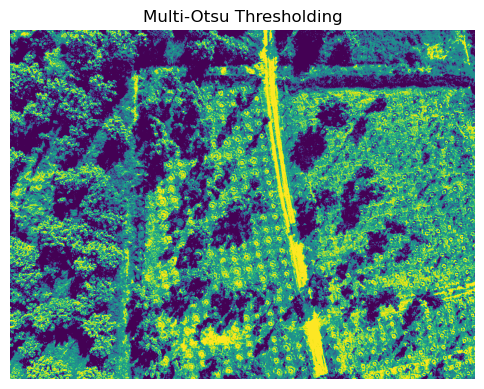

Image Processing Completed Successfully!


In [2]:
# Load the image and resize
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = r"C:\Users\adarsh\Downloads\GREEN AI\PROJECT\FASHION-MNIST-CLASSIFICATION\tree_dataset\testing\2_post-SW\DJI_20241229133642_0199_V.JPG"
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display helper function
def display(title, img, cmap=None):
    plt.figure(figsize=(6, 6))
    plt.title(title)
    plt.axis("off")
    plt.imshow(img, cmap=cmap)
    plt.show()

# Original Image
display("Original Image", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# 1. Smoothing
blur = cv2.blur(image, (5, 5))
gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)

display("Blurred (Mean)", cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
display("Blurred (Gaussian)", cv2.cvtColor(gaussian_blur, cv2.COLOR_BGR2RGB))

# 2. Sharpening
kernel_sharpening = np.array([[0, -1, 0],
                              [-1, 5, -1],
                              [0, -1, 0]])
sharpened = cv2.filter2D(image, -1, kernel_sharpening)
display("Sharpened Image", cv2.cvtColor(sharpened, cv2.COLOR_BGR2RGB))

# 3. Noise Reduction
denoised = cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)
display("Denoised Image", cv2.cvtColor(denoised, cv2.COLOR_BGR2RGB))

# 4. Contrast Adjustment
equalized_gray = cv2.equalizeHist(image_gray)
converted = cv2.convertScaleAbs(image, alpha=1.5, beta=20)

display("Equalized Histogram (Grayscale)", equalized_gray, cmap="gray")
display("Contrast Enhanced Image", cv2.cvtColor(converted, cv2.COLOR_BGR2RGB))

# 5. Edge Detection
edges_canny = cv2.Canny(image_gray, 100, 200)
edges_sobel = cv2.Sobel(image_gray, cv2.CV_64F, 1, 0, ksize=5)
edges_laplacian = cv2.Laplacian(image_gray, cv2.CV_64F)

display("Edges (Canny)", edges_canny, cmap="gray")
display("Edges (Sobel)", edges_sobel, cmap="gray")
display("Edges (Laplacian)", edges_laplacian, cmap="gray")

# 6. Morphological Operations
kernel = np.ones((5, 5), np.uint8)
eroded = cv2.erode(image_gray, kernel, iterations=1)
dilated = cv2.dilate(image_gray, kernel, iterations=1)
morph_open = cv2.morphologyEx(image_gray, cv2.MORPH_OPEN, kernel)
morph_close = cv2.morphologyEx(image_gray, cv2.MORPH_CLOSE, kernel)

display("Eroded Image", eroded, cmap="gray")
display("Dilated Image", dilated, cmap="gray")
display("Morphological Opening", morph_open, cmap="gray")
display("Morphological Closing", morph_close, cmap="gray")

# 7. Multi-Otsu Thresholding
_, otsu_thresh_1 = cv2.threshold(image_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
otsu_thresh_2, otsu_thresh_3 = cv2.threshold(image_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

from skimage.filters import threshold_multiotsu
thresholds = threshold_multiotsu(image_gray, classes=3)
regions = np.digitize(image_gray, bins=thresholds)

display("Otsu Thresholding", otsu_thresh_1, cmap="gray")
display("Multi-Otsu Thresholding", regions, cmap="viridis")

print("Image Processing Completed Successfully!")